In [ ]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

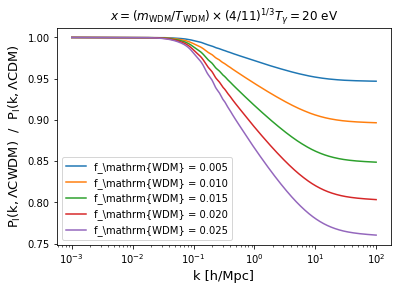

In [35]:
kmax = 100

ref = Class()
ref.set({
    'output':'mPk',
    'P_k_max_h/Mpc':kmax
          })
ref.compute()

kk = np.logspace(np.log10(0.001),np.log10(kmax),1000)
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

model = Class()
model.empty()
m=20
wcdm = 0.1201075
f_list = np.linspace(0.005,0.025,5)
Tnu_rel = (4./11.)**(1./3.)
for f in f_list :
    model.set({
        'output':'mPk',
        'N_ncdm':1,
        'm_ncdm':m,
        'T_ncdm' : Tnu_rel,
        #'YHe' : 0.24,
        'P_k_max_h/Mpc':kmax,
        'omega_cdm' :  wcdm-wcdm*f,
        'omega_ncdm' : wcdm*f
              })
    model.compute()
    h=model.h()
    plt.plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_ref, label = r'f_\mathrm{WDM}'+r' = {a:.3f}'.format(a=f) )
    
    plt.xscale('log')
    plt.yscale('linear')
    
    plt.ylabel(r'$\mathrm{P_l(k,\Lambda CWDM) \ \ / \ \ P_l(k,\Lambda CDM)}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    #plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
    plt.title(r'$x = (m_\mathrm{WDM}/T_\mathrm{WDM}) \times (4/11)^{1/3} T_\gamma =$'+r'{a} eV'.format(a=m))
    plt.legend()
    plt.savefig('ratio_of_pklin.png')

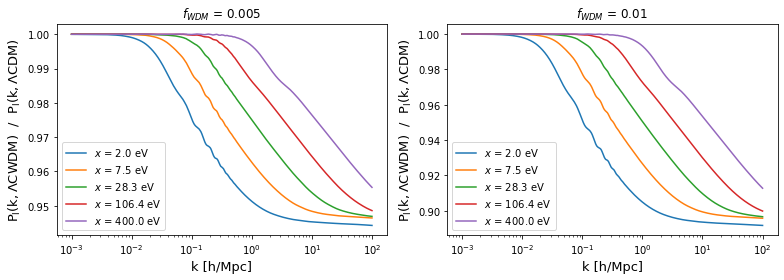

In [36]:
kmax = 100
kk = np.logspace(np.log10(0.001),np.log10(kmax),1000)

ref = Class()
ref.set({
    'output':'mPk',
    'P_k_max_h/Mpc':kmax
          })
ref.compute()
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(11,4))

model = Class()
wcdm = 0.1201075
f_wdm = 0.2
m_list = np.geomspace(2,400,5)
f_list = [0.005,0.01]
#f_list = np.linspace(0.01,0.05,5)

for i in range(2) :
    for m in m_list :
        f_wdm = f_list[i]
        model.set({
            'output':'mPk',
            'N_ncdm':1,
            'm_ncdm':m,
            'YHe' : 0.24,
            'P_k_max_h/Mpc':kmax,
            'omega_cdm' :  wcdm-wcdm*f_wdm,
            'omega_ncdm' : wcdm*f_wdm
                  })
        model.compute()
        h=model.h()
        ax[i].plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_ref, label = r'$x$ = {a:1.1f} eV'.format(a=m) )

    ax[i].set_xscale('log')
    ax[i].set_yscale('linear')
    ax[i].set_title(r'$f_{WDM}$ ' + '= {a}'.format(a=f_wdm))

    ax[i].set_ylabel(r'$\mathrm{P_l(k,\Lambda CWDM) \ \ / \ \ P_l(k,\Lambda CDM)}$', fontsize=13)
    ax[i].set_xlabel(r'k [h/Mpc]', fontsize=13)
    ax[i].legend()

plt.tight_layout()
plt.savefig('ratio_of_pklin_mnu.png')

In [ ]:
kmax = 500
kk = np.logspace(np.log10(0.01),np.log10(kmax),1000)

ref = Class()
ref.set({
    'output':'mPk',
    'P_k_max_h/Mpc':kmax
          })
ref.compute()
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

model = Class()
wcdm = 0.1201075
f_wdm = 0.3
f_list = np.arange(100,500,100)
for f in f_list :
    model.set({
        'output':'mPk',
        'N_ncdm':1,
        'm_ncdm':f,
        'YHe' : 0.24,
        'P_k_max_h/Mpc':kmax,
              })
    model.compute()
    h=model.h()
    plt.plot(kk,np.vectorize(model.pk_lin)(kk*h,0) /pk_ref, label = r'$m_\nu$ = {a:1.1f} eV'.format(a=f) )
    
    plt.xscale('log')
    plt.yscale('linear')
    
    plt.ylabel(r'$\mathrm{P_l(k,\Lambda CWDM) \ \ / \ \ P_l(k,\Lambda CDM)}$', fontsize=13)
    plt.xlabel(r'k [h/Mpc]', fontsize=13)
    plt.legend()
    plt.savefig('ratio_of_pklin_mnu_only.png')